**Context**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


**Content**

Attribute Information:

age

sex


chest pain type (4 values)


resting blood pressure


serum cholestoral in mg/dl


fasting blood sugar > 120 mg/dl


resting electrocardiographic results (values 0,1,2)


maximum heart rate achieved


exercise induced angina


oldpeak = ST depression induced by exercise relative to rest


the slope of the peak exercise ST segment


number of major vessels (0-3) colored by flourosopy


thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.



**Acknowledgements - Creators:**

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha 

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


#1.Loading Data from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexanderkala","key":"424eb51969be205d4eb826370b561226"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Dec 28 19:04 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s Heart 

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                      Heart Disease UCI                                     3KB  2018-06-25 11:33:56         180464  
andrewmvd/heart-failure-clinical-data                         Heart Failure Prediction                              4KB  2020-06-20 01:03:20          23275  
johnsmith88/heart-disease-dataset                             Heart Disease Dataset                                 6KB  2019-06-06 15:33:55          11610  
imnikhilanand/heart-attack-prediction                         Heart Attack Prediction                               3KB  2018-04-25 18:24:01          10490  
kinguistics/heartbeat-sounds                        

In [ ]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 5.10MB/s]


In [ ]:
!unzip \*.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


# 2.Exploratory Data Analysis

In [213]:
import pandas as pd
dt = pd.read_csv("../content/heart.csv")
dt.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dt.sum()

age         16473.0
sex           207.0
cp            293.0
trestbps    39882.0
chol        74618.0
fbs            45.0
restecg       160.0
thalach     45343.0
exang          99.0
oldpeak       315.0
slope         424.0
ca            221.0
thal          701.0
target        165.0
dtype: float64

In [ ]:
!pip install pandas-profiling==2.7.1
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(dt)
prof.to_file(output_file='output.html')

In [214]:
import numpy as np

In [ ]:
#how many target(diseased patients) does the dataset contain?
dt.target.value_counts()

1    165
0    138
Name: target, dtype: int64

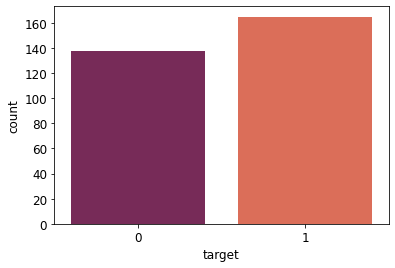

In [215]:
#bar chart plot, to visualize the targets
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="target", data=dt, palette="rocket")
plt.show()

In [ ]:
HD = len(dt[dt.target == 1]) #Heart Disease
ND = len(dt[dt.target == 0]) #No Heart Disease

print("Percentage of Patients That Have Heart Disease: {:.2f}%".format((HD / (len(dt.target))*100)))
print("Percentage of Patients That Don't Have Heart Disease: {:.2f}%".format((ND / (len(dt.target))*100)))

Percentage of Patients That Have Heart Disease: 54.46%
Percentage of Patients That Don't Have Heart Disease: 45.54%


Percentage of Female Subjects On The Study: 31.68%
Percentage of Male Subjects On The Study: 68.32%


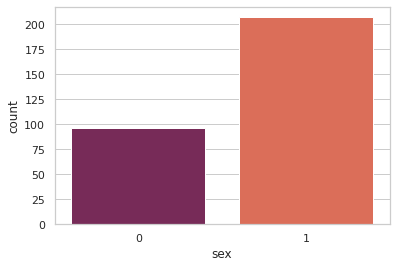

In [ ]:
#Now we want to see how many female/male patients does the dataset contain.
#This will help us to have a better understanding of the data and even find if there is higher correlation 
  #between the disease and the sexes.
Fem = len(dt[dt.sex == 0]) #Female patients
Mal = len(dt[dt.sex == 1]) #male patients
print("Percentage of Female Subjects On The Study: {:.2f}%".format((Fem / (len(dt.sex))*100)))
print("Percentage of Male Subjects On The Study: {:.2f}%".format((Mal / (len(dt.sex))*100)))

#bar chart plot, to visualize the sex

sns.countplot(x="sex", data=dt, palette="rocket")
plt.show()

In [ ]:
#General Age Mean
dt.age.mean()

54.366336633663366

In [ ]:
dt.groupby("target").max() #Group data by the targets (0=No disease, 1= Disease), Max Results

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,77,1,3,200,409,1,2,195,1,6.2,2,4,3
1,76,1,3,180,564,1,2,202,1,4.2,2,4,3


In [ ]:
dt.groupby("target").min() #Group data by the targets (0=No disease, 1= Disease), Min Results

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,35,0,0,100,131,0,0,71,0,0.0,0,0,0
1,29,0,0,94,126,0,0,96,0,0.0,0,0,0


In [ ]:
dt.groupby("target").mean()  #Group data by the targets (0=No disease, 1= Disease), Mean Results

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


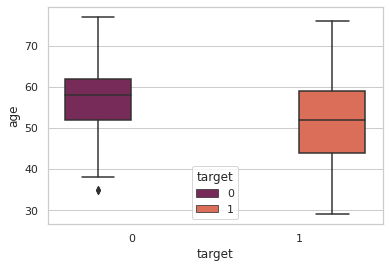

In [ ]:
#Boxplot of taget/age
#Is age an important factor for the disease?
sns.set_theme(style="whitegrid")
dt.head()
ax = sns.boxplot(x="target", y="age", hue="target", data=dt, palette="rocket")


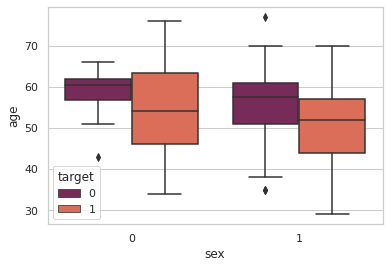

In [ ]:
#Detailed boxplot of sex/age - Orange = HD, Purple=ND, 0=Female Patients, 1=Male Patients

sns.set_theme(style="whitegrid")
dt.head()
ax = sns.boxplot(x="sex", y="age", hue="target", data=dt, palette="rocket")


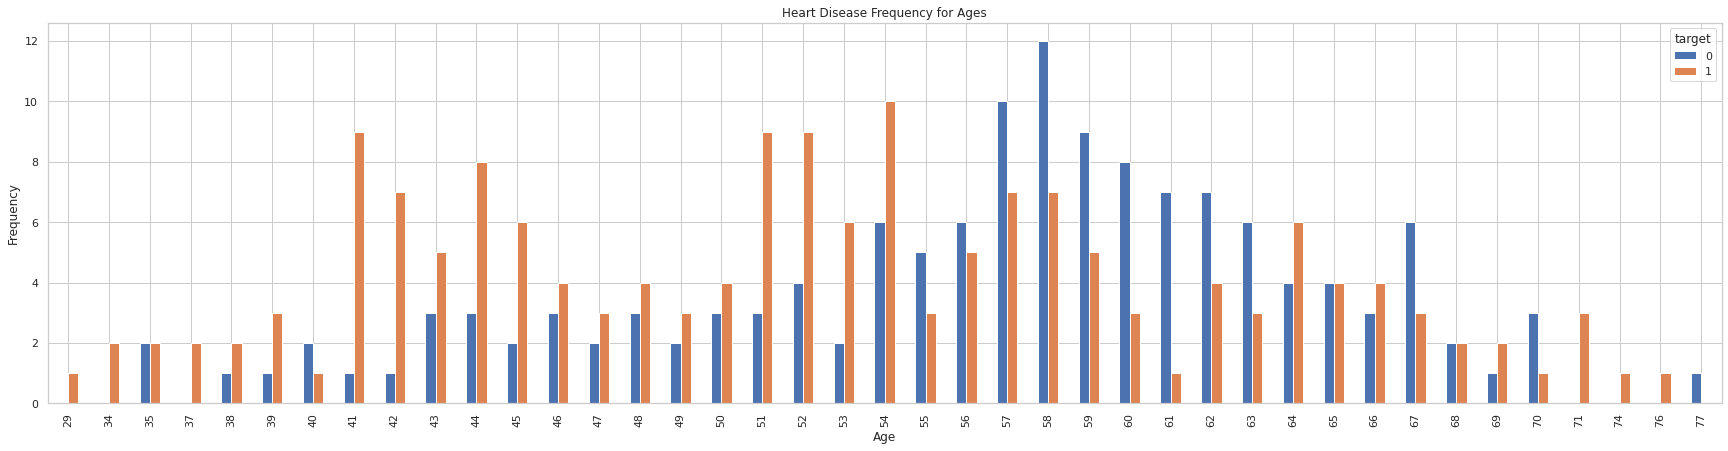

In [ ]:
#Detailed graph of frequency of disease & age

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(30,7))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

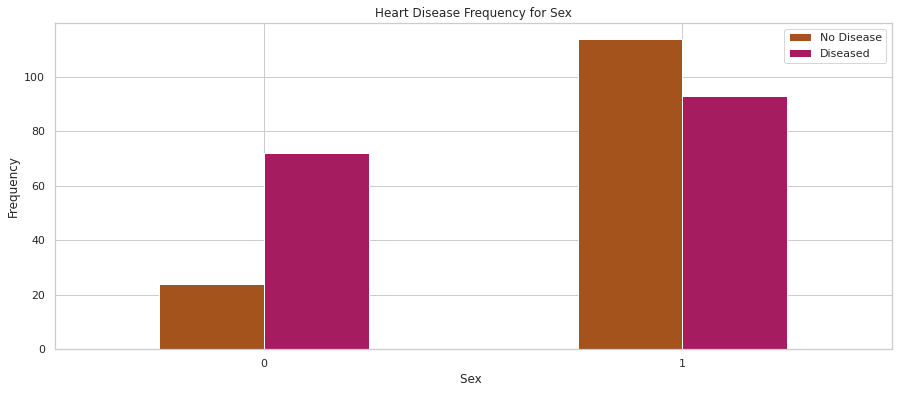

In [ ]:
#Bar chart showing the frequency of disease between the sexes (0=female, 1=male)

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#a5531c', '#a51c61' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex ') #0=Female, 1=Male Patients
plt.xticks(rotation=0)
plt.legend(["No Disease", "Diseased"])
plt.ylabel('Frequency')
plt.show()

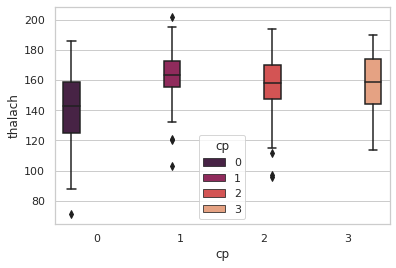

In [ ]:
#Boxplot of chest pain/max heart rate

sns.set_theme(style="whitegrid")
dt.head()
ax = sns.boxplot(x="cp", y="thalach", hue="cp", data=dt, palette="rocket")

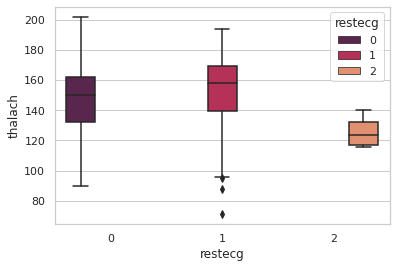

In [ ]:
#Boxplot of chest resting heart rate/max heart rate

sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
dt.head()
ax = sns.boxplot(x="restecg", y="thalach",hue="restecg", 
                 data=dt, palette="rocket")

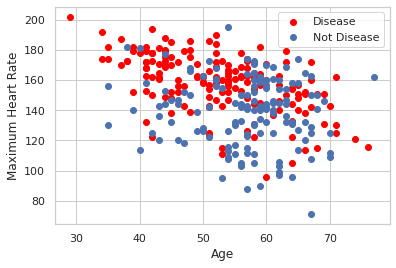

In [ ]:
#Scatter plot to see if there is a correlation between age & max heart rate

plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

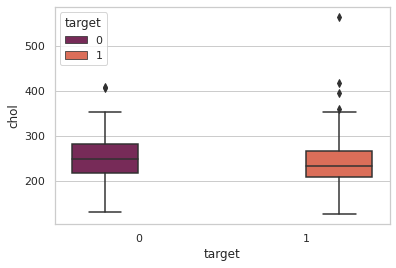

In [ ]:
#Boxplot of target/cholesterol
#we want to see if chol is more noticable in diseased patients
sns.set_theme(style="whitegrid")
dt.head()
ax = sns.boxplot(x="target", y="chol",hue="target", 
                 data=dt, palette="rocket")

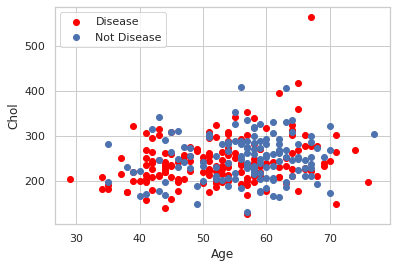

In [ ]:
#Scatter plot of age/chol
#Do older people have higher chol or other factor to consider?

plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Chol")
plt.show()

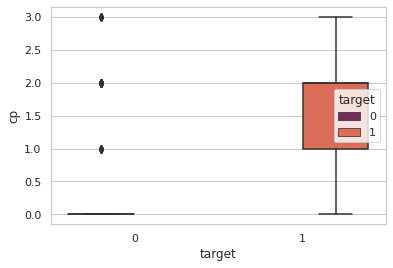

In [ ]:
#How relevant is chest pain?
#Boxplot of chest pain / target
sns.set_theme(style="whitegrid")
dt.head()
ax = sns.boxplot(x="target", y="cp",hue="target", 
                 data=dt, palette="rocket")

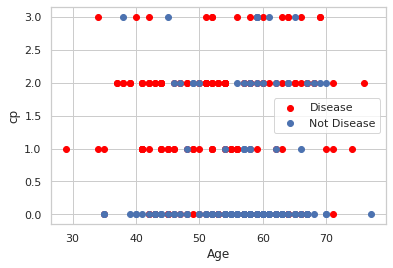

In [ ]:
#Scatter plot of age/chest pain

plt.scatter(x=df.age[df.target==1], y=df.cp[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.cp[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("cp")
plt.show()

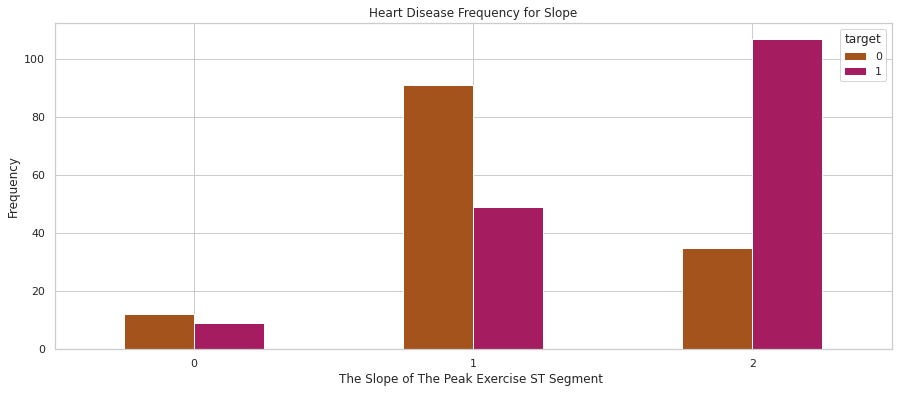

In [ ]:
#Bar chart, heart disease frequency /slope

pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#a5531c','#a51c61' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

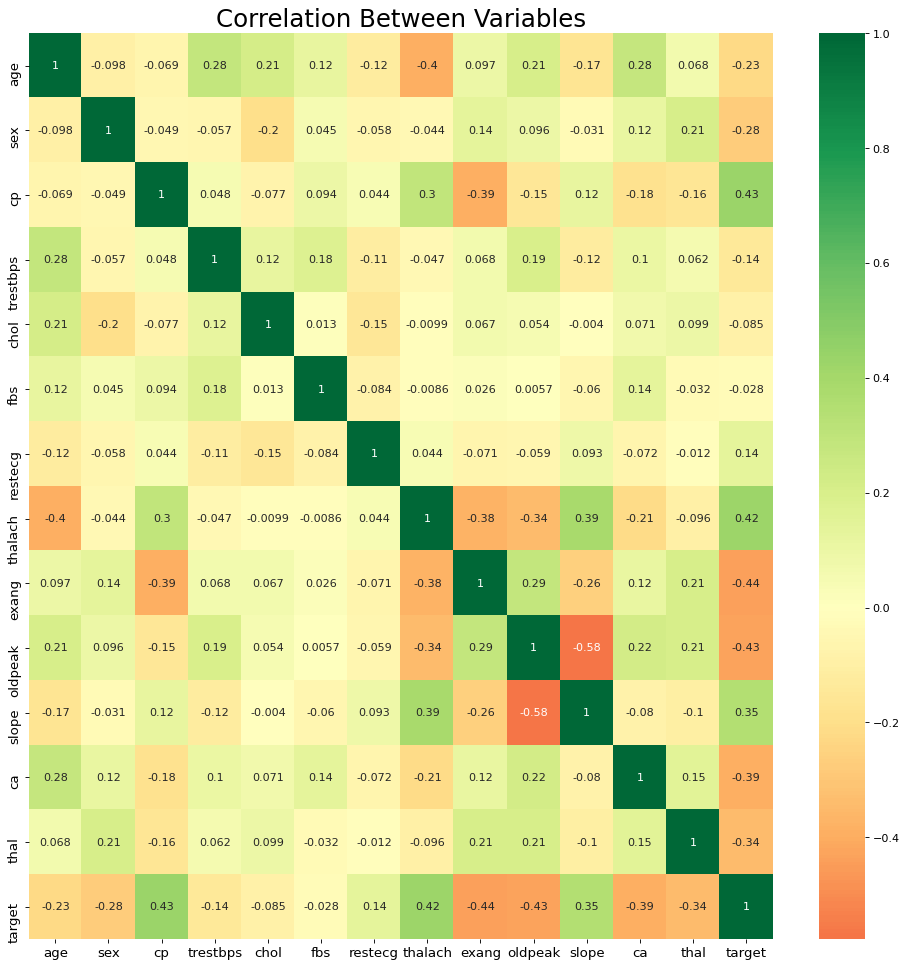

In [ ]:
#Cologram, to see the correlation between the variables 

# Plot
plt.figure(figsize=(15,15), dpi= 80)
sns.heatmap(dt.corr(), xticklabels=dt.corr().columns, yticklabels=dt.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation Between Variables', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

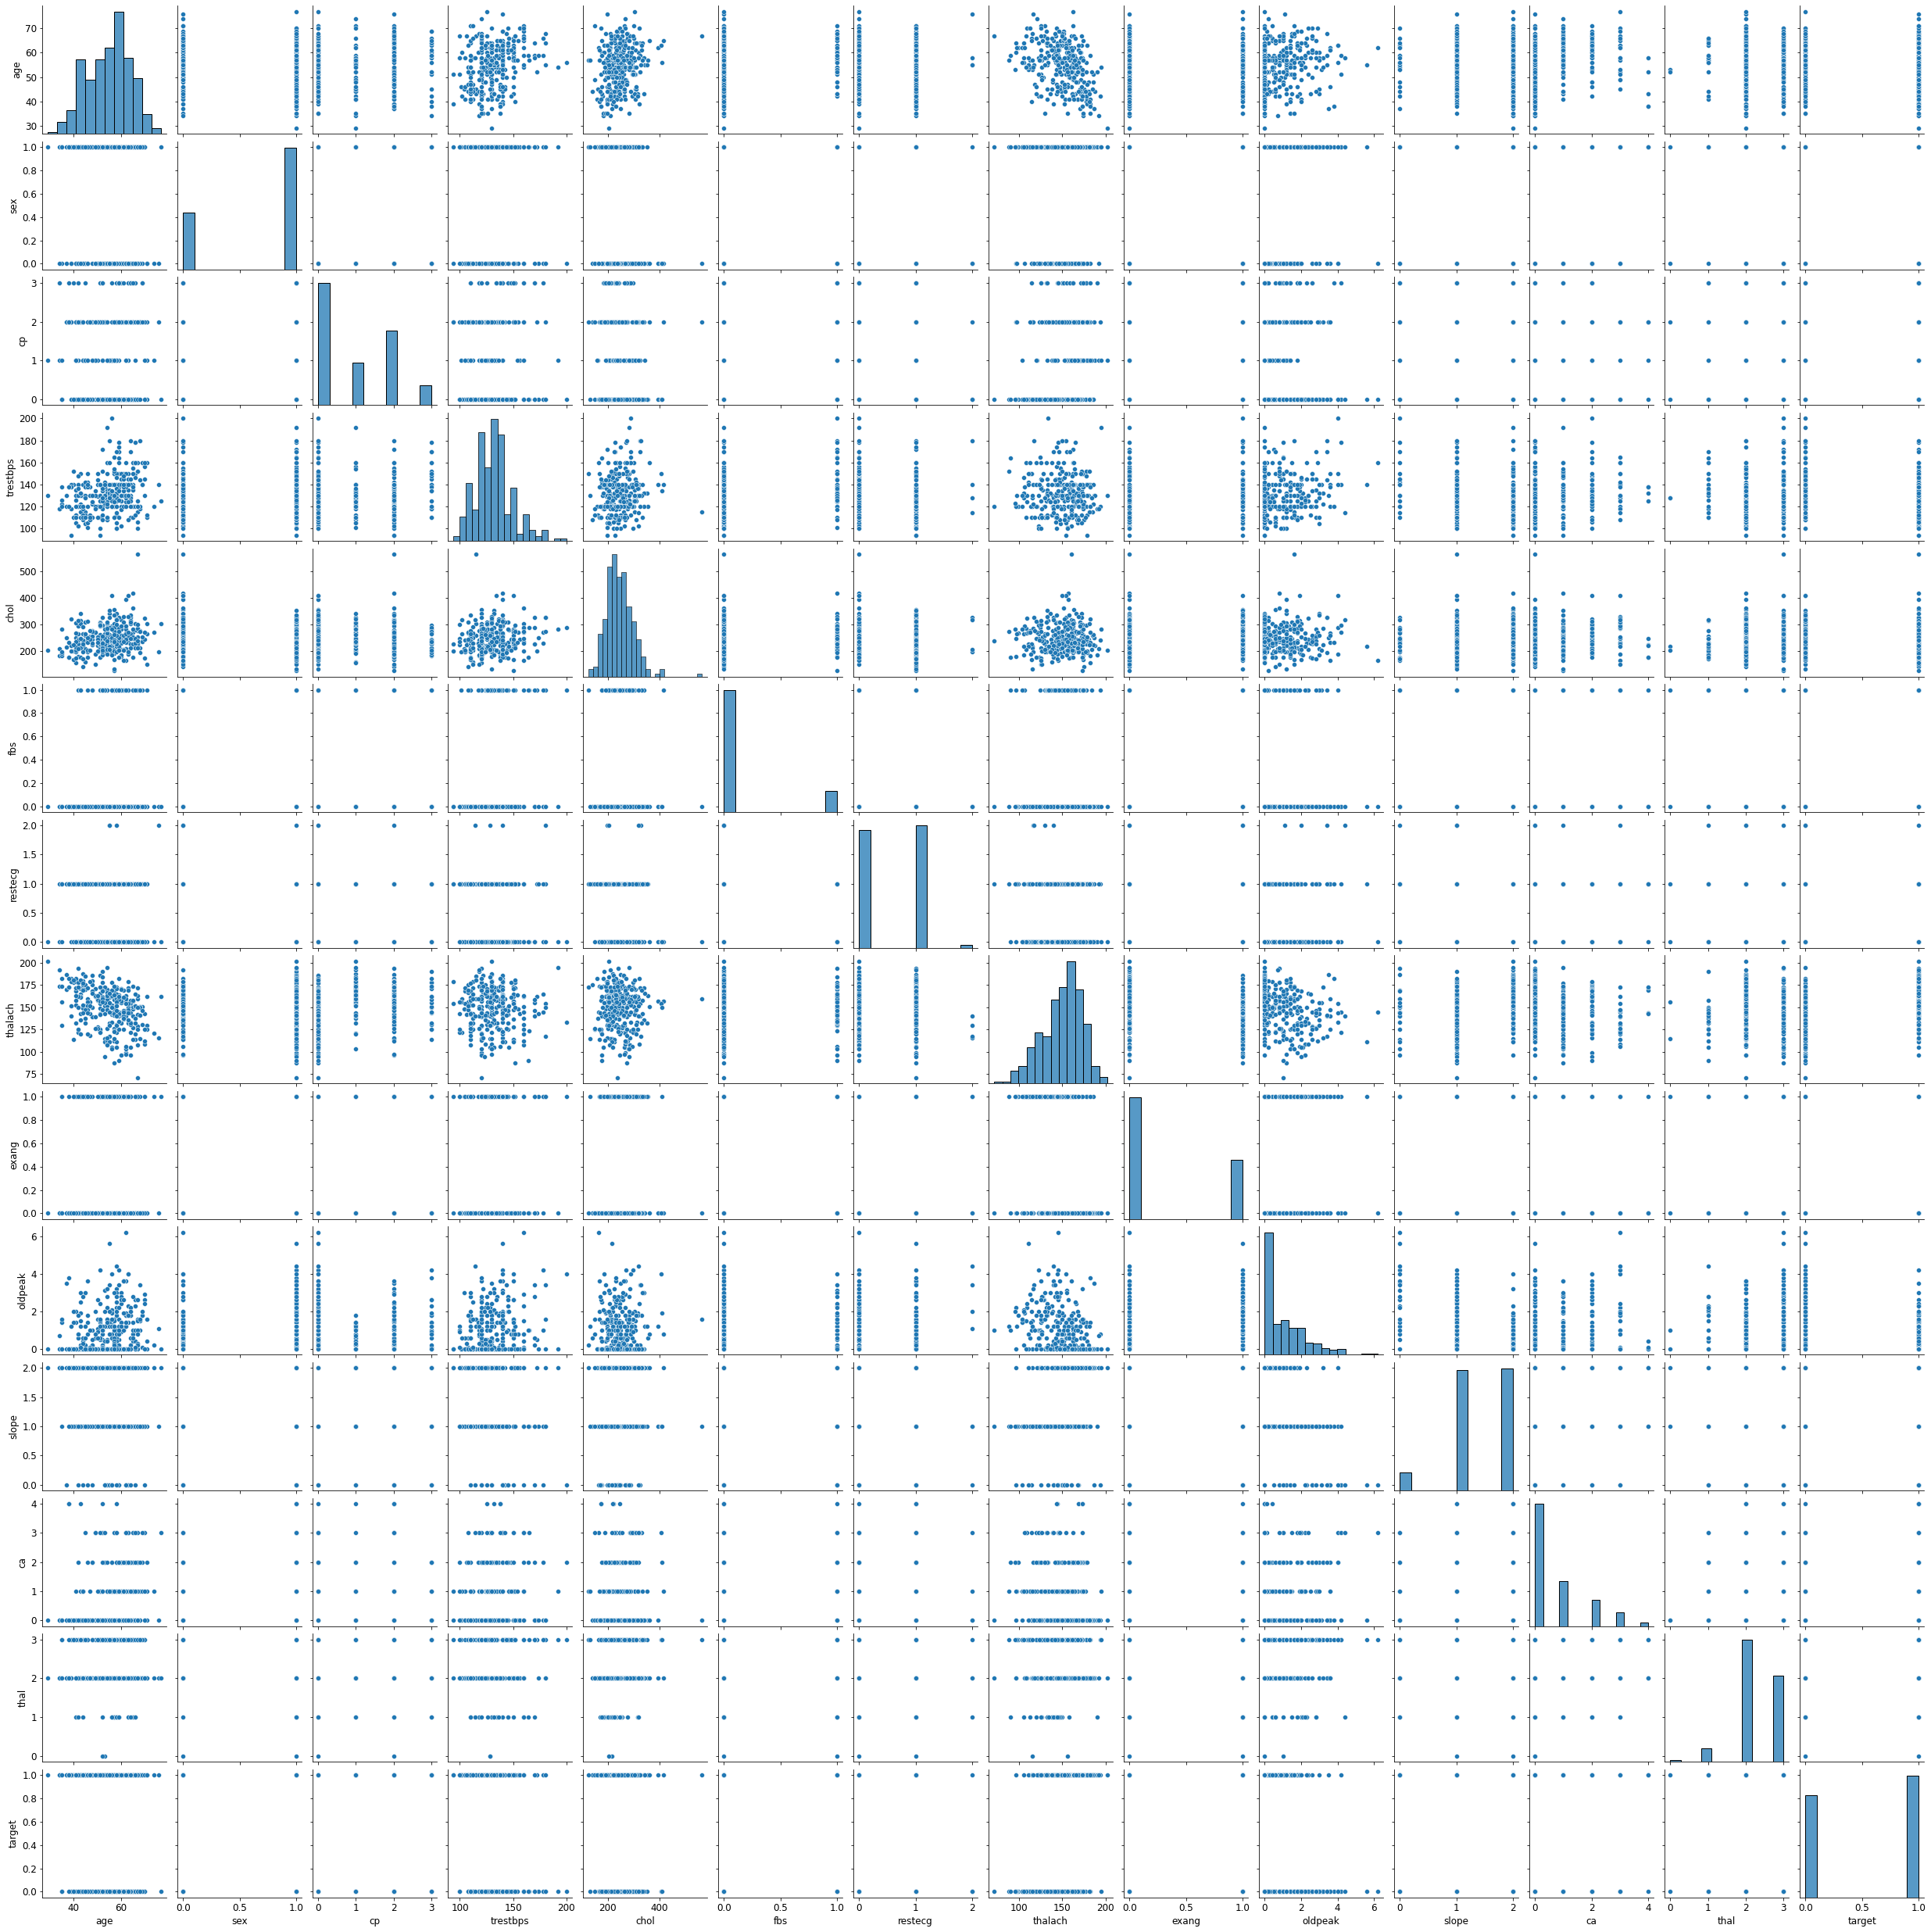

In [ ]:
#If we want to plot and compare every variable on our dataset we can use the code below

#sns.pairplot(dt)
#plt.show()

# 3.AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report, balanced_accuracy_score #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
#from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .3, random_state=5) #split the data


In [ ]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Data Shape:", y_train.shape)
print("Testing Data Shape:", y_test.shape)

Training Data Shape: (212, 13)
Testing Data Shape: (91, 13)
Training Data Shape: (212,)
Testing Data Shape: (91,)


In [ ]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

<function matplotlib.pyplot.show>

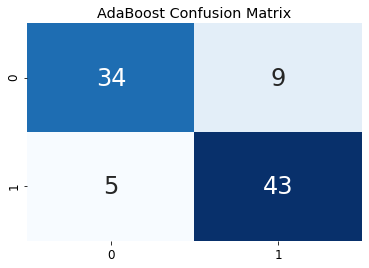

In [ ]:
cm = confusion_matrix(y_test, y_pred_bin)
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show

In [ ]:
total=sum(sum(cm))

print((metrics.classification_report(y_test, y_pred_bin, digits=3)))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

print('Balanced Accuracy : ', balanced_accuracy_score(y_test, y_pred_bin,sample_weight=None, adjusted=False))

print('f1 score :', f1_score(y_test, y_pred_bin, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'))


              precision    recall  f1-score   support

           0      0.872     0.791     0.829        43
           1      0.827     0.896     0.860        48

    accuracy                          0.846        91
   macro avg      0.849     0.843     0.845        91
weighted avg      0.848     0.846     0.845        91

Sensitivity :  0.8717948717948718
Specificity :  0.8269230769230769
Balanced Accuracy :  0.843265503875969
f1 score : 0.86


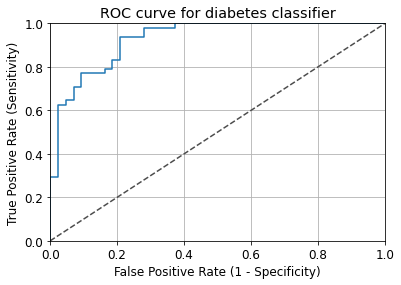

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)


0.9287790697674418

# 4.Logistic Regression Model

In [216]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report, balanced_accuracy_score #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
#from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV

In [217]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .3, random_state=5) #split the data
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [219]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Data Shape:", y_train.shape)
print("Testing Data Shape:", y_test.shape)

Training Data Shape: (212, 13)
Testing Data Shape: (91, 13)
Training Data Shape: (212,)
Testing Data Shape: (91,)


<function matplotlib.pyplot.show>

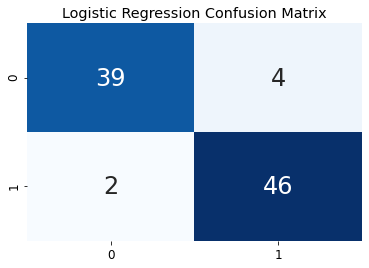

In [220]:
cm = confusion_matrix(y_test, y_pred_bin)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show

In [221]:
total=sum(sum(cm))

print((metrics.classification_report(y_test, y_pred_bin, digits=3)))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

print('Balanced Accuracy : ', balanced_accuracy_score(y_test, y_pred_bin,sample_weight=None, adjusted=False))

print('f1 score :', f1_score(y_test, y_pred_bin, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'))


              precision    recall  f1-score   support

           0      0.951     0.907     0.929        43
           1      0.920     0.958     0.939        48

    accuracy                          0.934        91
   macro avg      0.936     0.933     0.934        91
weighted avg      0.935     0.934     0.934        91

Sensitivity :  0.9512195121951219
Specificity :  0.92
Balanced Accuracy :  0.9326550387596899
f1 score : 0.9387755102040817


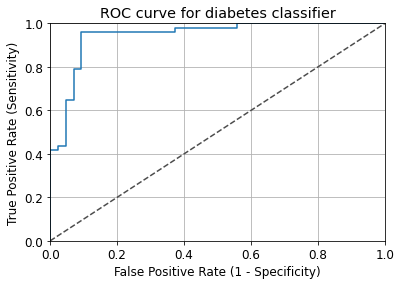

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)

0.9447674418604651

# 5.Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score, log_loss, accuracy_score
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report, balanced_accuracy_score #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
#from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target', 1), dt['target'], test_size = .3, random_state=5) #split the data
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [ ]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Data Shape:", y_train.shape)
print("Testing Data Shape:", y_test.shape)

Training Data Shape: (212, 13)
Testing Data Shape: (91, 13)
Training Data Shape: (212,)
Testing Data Shape: (91,)


<function matplotlib.pyplot.show>

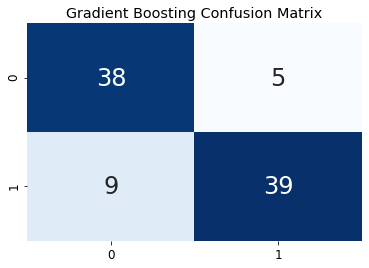

In [ ]:
cm = confusion_matrix(y_test, y_pred_bin)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show

In [ ]:
total=sum(sum(cm))

print((metrics.classification_report(y_test, y_pred_bin, digits=3)))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

print('Balanced Accuracy : ', balanced_accuracy_score(y_test, y_pred_bin,sample_weight=None, adjusted=False))

print('f1 score :', f1_score(y_test, y_pred_bin, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'))


              precision    recall  f1-score   support

           0      0.809     0.884     0.844        43
           1      0.886     0.812     0.848        48

    accuracy                          0.846        91
   macro avg      0.847     0.848     0.846        91
weighted avg      0.850     0.846     0.846        91

Sensitivity :  0.8085106382978723
Specificity :  0.8863636363636364
Balanced Accuracy :  0.8481104651162791
f1 score : 0.8478260869565218


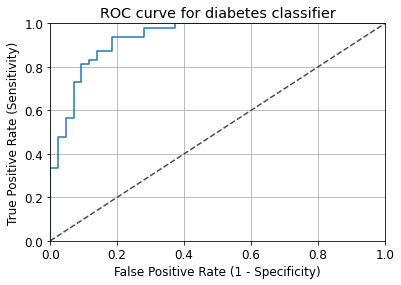

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)

0.9341085271317829